# Optimizing Operational Performance of a Maritime Fleet Using Clustering

**A logistics company manages a diverse fleet of ships transporting goods across various routes. Despite access to detailed operational data, the management lacks clarity on which types of voyages are cost-effective, which need optimization, and how operational patterns relate to ship performance.**

**Business Problem**
- Can we segment ship voyages into meaningful operational clusters to optimize cost, improve voyage planning, and identify underperforming fleet segments?"
- You are tasked with building a K-Means clustering model that helps classify voyages into different performance groups - such as cost-efficient, high-revenue, underperforming, etc.

Dataset Columns 
- Date -- Date of the voyage
- Ship_Type -- Type of ship (e.g., Container, Bulk Carrier, Fish Carrier)
- Route_Type -- Nature of the voyage (Short-haul, Long-haul, Transoceanic)
- Engine_Type -- Type of engine used (e.g., Diesel, Steam Turbine, HFO)
- Maintenance_Status -- Current condition of the ship’s maintenance (Good, Fair, Critical)
- Speed_Over_Ground_knots -- Ship’s average speed during voyage
- Engine_Power_kW -- Power output of the ship’s engine
- Distance_Traveled_nm -- Distance of the voyage in nautical miles
- Draft_meters -- Vertical distance between waterline and bottom of the hull
- Weather_Condition -- Weather during voyage (Moderate, Rough, etc.)
- Cargo_Weight_tons -- Cargo carried in tons
- Operational_Cost_USD -- Cost incurred for the voyage
- Revenue_per_Voyage_USD -- Revenue generated from the voyage
- Turnaround_Time_hours -- Total time the ship took for the voyage including port delays
- Efficiency_nm_per_kWh -- Distance efficiency based on power consumed
- Seasonal_Impact_Score -- Environmental or seasonal impact score
- Weekly_Voyage_Count -- Number of voyages by this ship in a week
- Average_Load_Percentage -- Average load percentage vs max capacity

--------

## Import libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [90]:
df = pd.read_csv('../Maritime-Fleet-Operations-Optimization-through-Clustering/Ship_Performance_Dataset.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


------

## Data Preprocessing

### Handling inconsisties

Change the Date column into datetime format.

In [91]:
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [92]:
num = df.select_dtypes(include=['number']).columns

for i in num:
    print(f'Unique values in {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print('========================================')

Unique values in Speed_Over_Ground_knots: 2736
Speed_Over_Ground_knots
12.597558    1
10.441932    1
10.575816    1
10.840201    1
13.962049    1
            ..
14.547820    1
17.051464    1
11.241117    1
14.518760    1
11.527987    1
Name: count, Length: 2736, dtype: int64
Unique values in Engine_Power_kW: 2736
Engine_Power_kW
2062.983982    1
2804.380957    1
1432.570693    1
1440.600735    1
2168.721772    1
              ..
1111.671804    1
2756.570598    1
611.512317     1
1669.486889    1
2928.588108    1
Name: count, Length: 2736, dtype: int64
Unique values in Distance_Traveled_nm: 2736
Distance_Traveled_nm
1030.943616    1
1109.910506    1
1567.535844    1
1570.506984    1
1277.706598    1
              ..
780.662497     1
1573.466767    1
518.072154     1
1540.675120    1
1930.235779    1
Name: count, Length: 2736, dtype: int64
Unique values in Draft_meters: 2736
Draft_meters
14.132284    1
7.650915     1
12.202571    1
5.022888     1
8.370894     1
            ..
8.925679   

In [93]:
cat = df.select_dtypes(include=['object']).columns

for i in cat:
    print(f'Unique values in {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print('========================================')

Unique values in Ship_Type: 4
Ship_Type
Bulk Carrier      669
Fish Carrier      653
Tanker            643
Container Ship    635
Name: count, dtype: int64
Unique values in Route_Type: 4
Route_Type
Long-haul       686
Coastal         650
Transoceanic    638
Short-haul      626
Name: count, dtype: int64
Unique values in Engine_Type: 3
Engine_Type
Diesel                  892
Steam Turbine           855
Heavy Fuel Oil (HFO)    853
Name: count, dtype: int64
Unique values in Maintenance_Status: 3
Maintenance_Status
Good        873
Fair        867
Critical    860
Name: count, dtype: int64
Unique values in Weather_Condition: 3
Weather_Condition
Calm        893
Moderate    891
Rough       816
Name: count, dtype: int64


In [94]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     2736 non-null   datetime64[ns]
 1   Ship_Type                2600 non-null   object        
 2   Route_Type               2600 non-null   object        
 3   Engine_Type              2600 non-null   object        
 4   Maintenance_Status       2600 non-null   object        
 5   Speed_Over_Ground_knots  2736 non-null   float64       
 6   Engine_Power_kW          2736 non-null   float64       
 7   Distance_Traveled_nm     2736 non-null   float64       
 8   Draft_meters             2736 non-null   float64       
 9   Weather_Condition        2600 non-null   object        
 10  Cargo_Weight_tons        2736 non-null   float64       
 11  Operational_Cost_USD     2736 non-null   float64       
 12  Revenue_per_Voyage_USD   2736 non-

,count,mean,min,25%,50%,75%,max,std
Date,2736,2023-12-17 00:00:00,2023-06-04 00:00:00,2023-09-10 00:00:00,2023-12-17 00:00:00,2024-03-24 00:00:00,2024-06-30 00:00:00,NaN
Speed_Over_Ground_knots,2736.0,17.602863,10.009756,13.928452,17.713757,21.284785,24.997043,4.311979
Engine_Power_kW,2736.0,1757.610939,501.02522,1148.104914,1757.494344,2382.594292,2998.734329,717.002777
Distance_Traveled_nm,2736.0,1036.406203,50.43315,548.511573,1037.81606,1540.934161,1998.337057,568.63208
Draft_meters,2736.0,9.929103,5.001947,7.437485,9.918965,12.413149,14.992947,2.876423
Cargo_Weight_tons,2736.0,1032.573264,50.229624,553.983629,1043.207497,1527.722391,1999.126697,558.697499
Operational_Cost_USD,2736.0,255143.344488,10092.306318,131293.378767,257157.653226,381796.930499,499734.867868,140890.482189
Revenue_per_Voyage_USD,2736.0,521362.062011,50351.814447,290346.388017,520176.931762,750072.791216,999916.69614,271211.625499
Turnaround_Time_hours,2736.0,41.747536,12.019909,26.173537,41.585188,57.363922,71.972415,17.63313
Efficiency_nm_per_kWh,2736.0,0.798656,0.100211,0.463592,0.789877,1.147426,1.499259,0.40359


------

### Handle missing values

In [95]:
import missingno as msno

<Axes: >

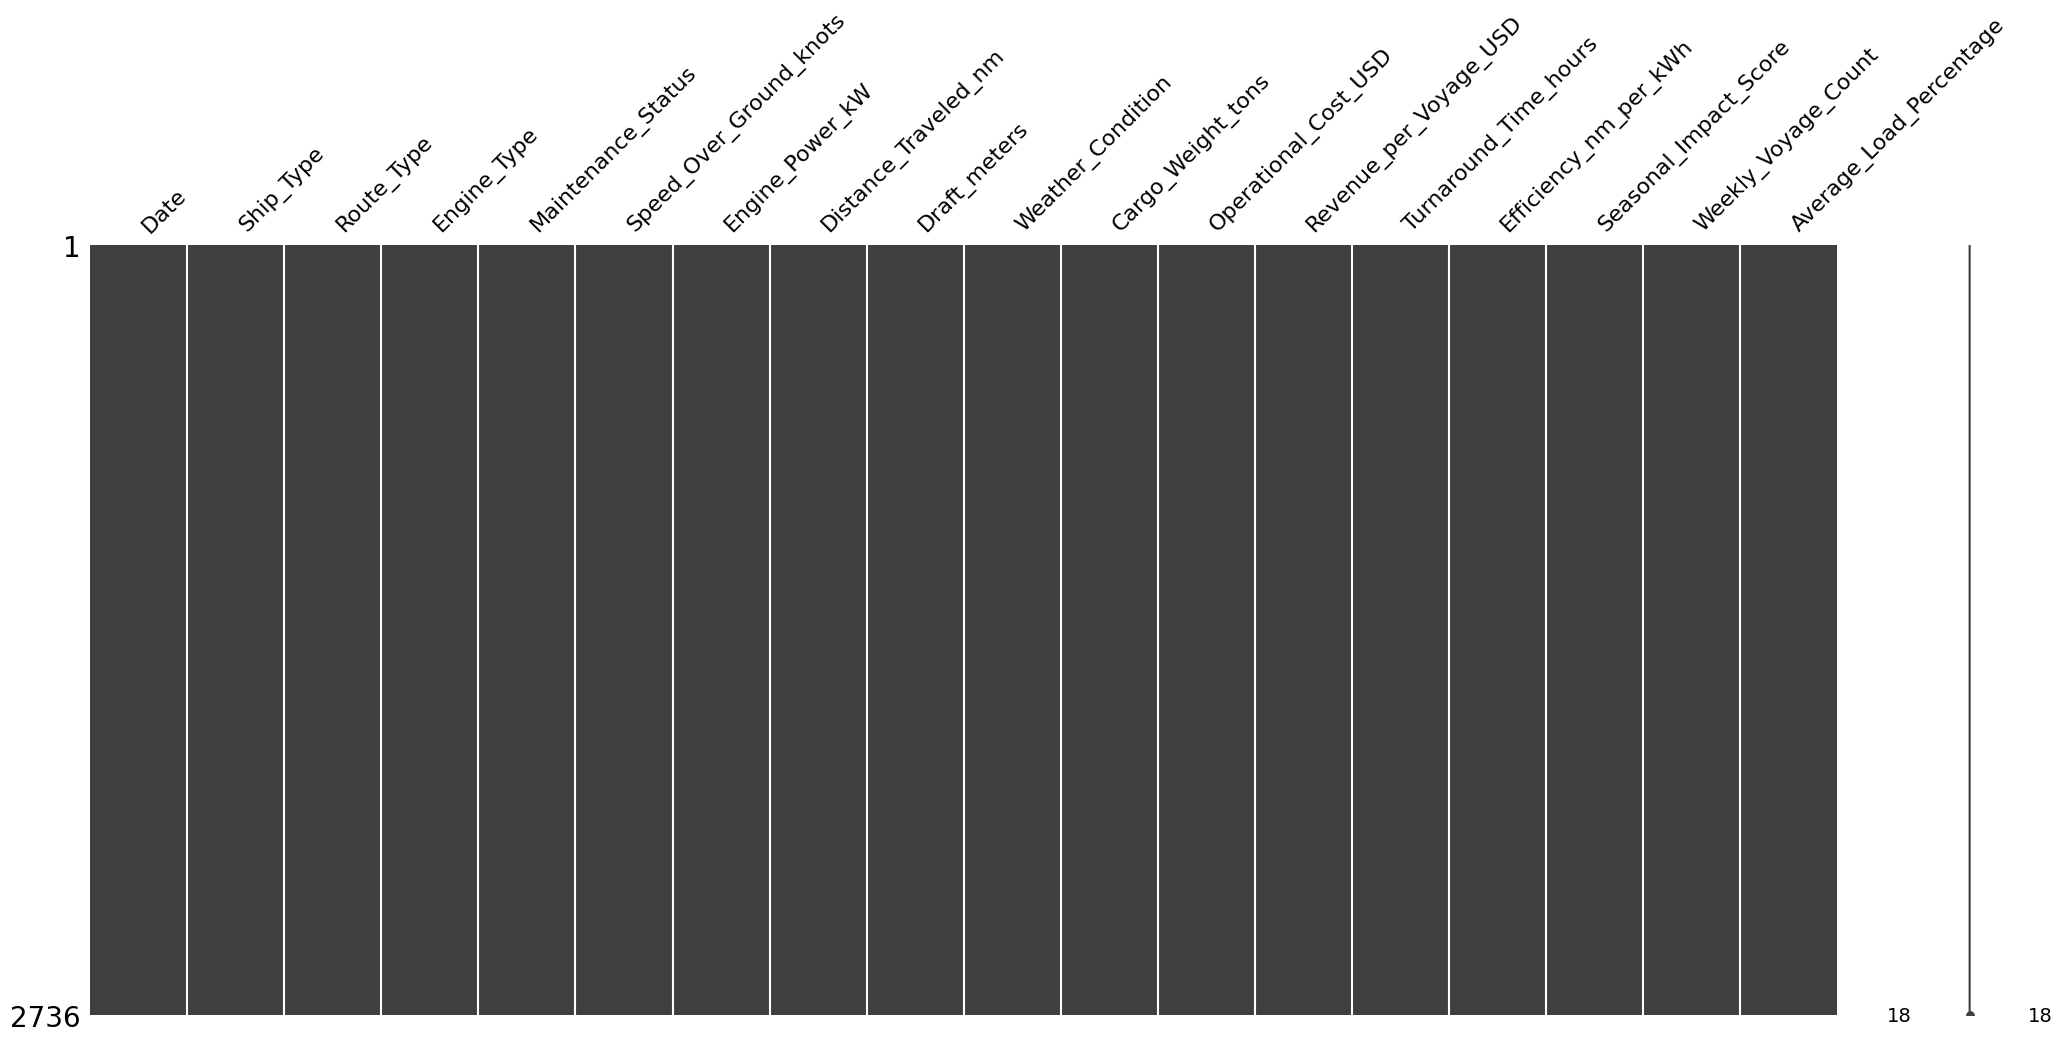

In [102]:
msno.matrix(df)

In [101]:
df.isnull().sum().sort_values(ascending=False)

Date                       0
Ship_Type                  0
Weekly_Voyage_Count        0
Seasonal_Impact_Score      0
Efficiency_nm_per_kWh      0
Turnaround_Time_hours      0
Revenue_per_Voyage_USD     0
Operational_Cost_USD       0
Cargo_Weight_tons          0
Weather_Condition          0
Draft_meters               0
Distance_Traveled_nm       0
Engine_Power_kW            0
Speed_Over_Ground_knots    0
Maintenance_Status         0
Engine_Type                0
Route_Type                 0
Average_Load_Percentage    0
dtype: int64

The missing values are CMAR, that is good sign.

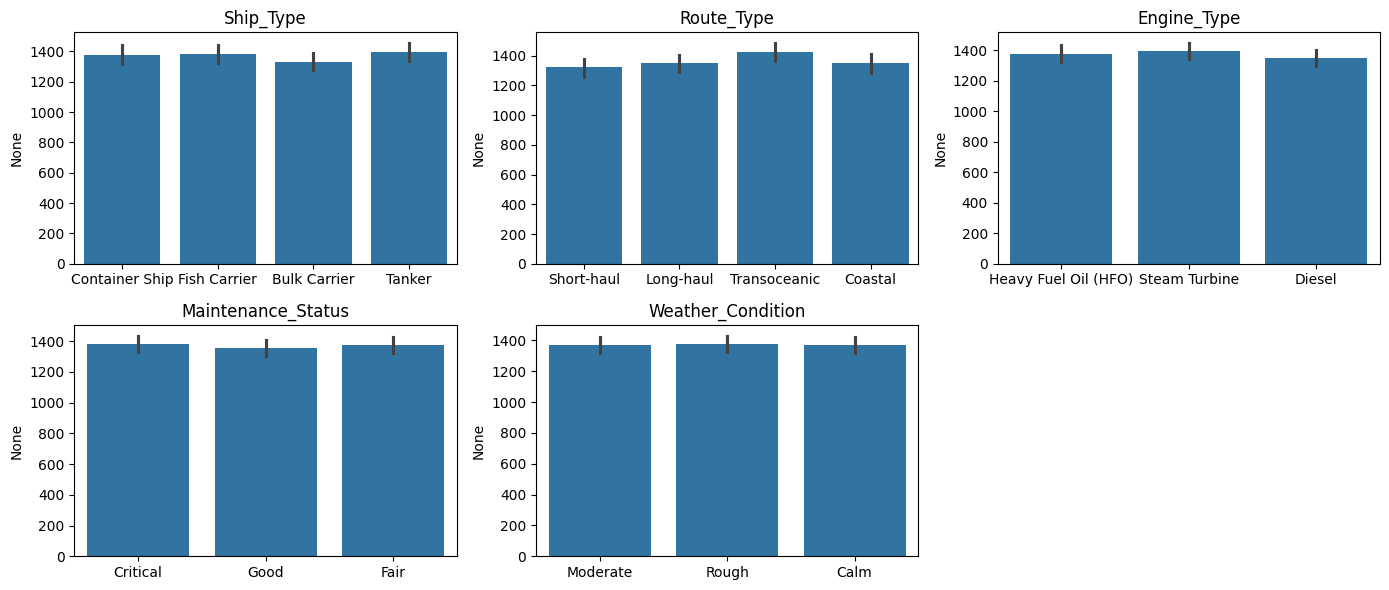

In [98]:
miss_val = df.columns[df.isnull().sum() > 0]

plt.figure(figsize=(14, 6))
for i, col in enumerate(miss_val):
    plt.subplot(2,3,i+1)
    sns.barplot(data=df, x=df[col].values, y=df[col].index, orient='v')
    plt.title(col)
plt.tight_layout()
plt.show()

In [99]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    missing_indices = df[col].isnull()
    non_missing_values = df[col].dropna().tolist()
    if non_missing_values:
        df.loc[missing_indices, col] = np.random.choice(non_missing_values, size=missing_indices.sum())  

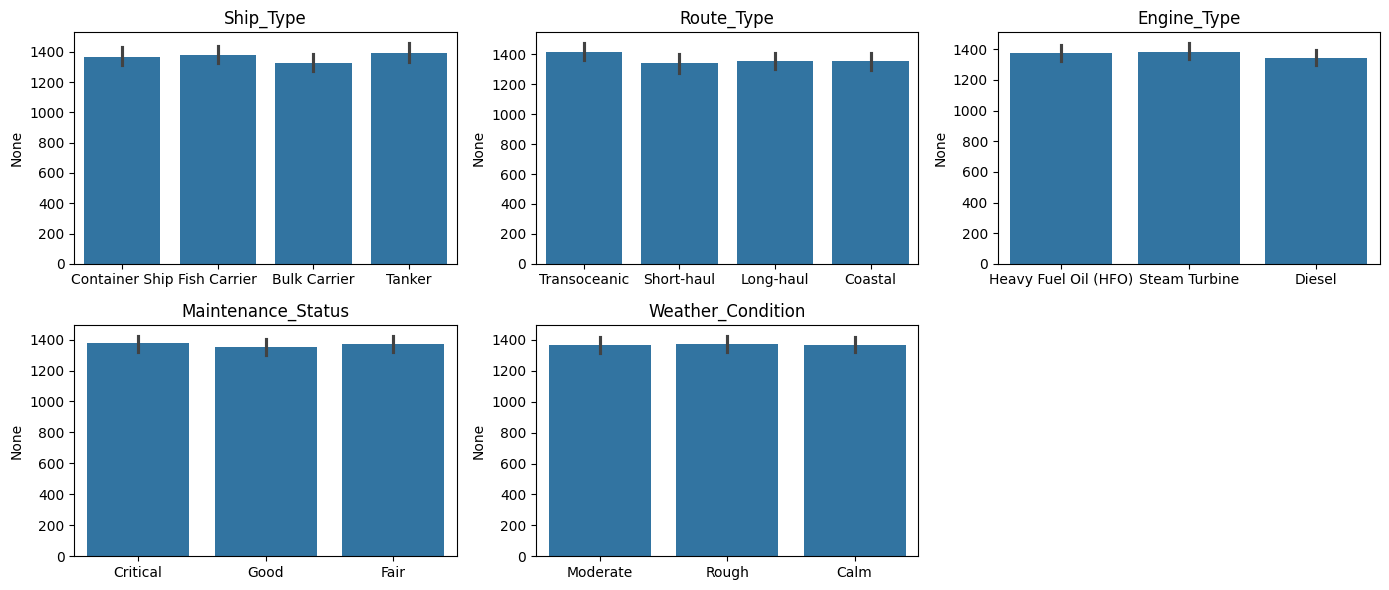

In [100]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(2,3,i+1)
    sns.barplot(data=df, x=df[col].values, y=df[col].index, orient='v')
    plt.title(col)
plt.tight_layout()
plt.show()

In [103]:
df.duplicated().sum()

0

No duplicates

-----

### Feature Engineering

In [ ]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

In [121]:
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type','Weather_Condition']
ordinal_features = ['Maintenance_Status']

In [124]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', drop='first')
ordinal = OrdinalEncoder(categories=[['Good', 'Fair', 'Critical']])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', onehot, categorical_features),
        ('ord', ordinal, ordinal_features)],
    remainder='passthrough')

----------

### Feature Selection

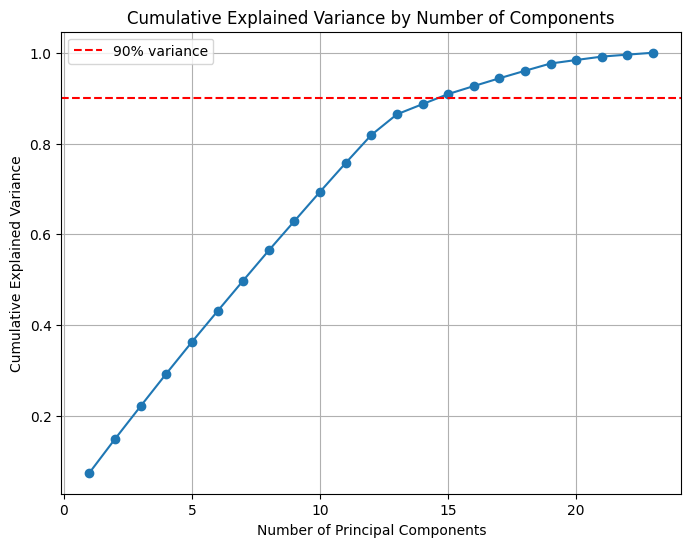

In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Define your numerical, categorical, and ordinal features
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Weather_Condition']
ordinal_features = ['Maintenance_Status']

# Define transformers
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', drop='first')
ordinal = OrdinalEncoder(categories=[ ['Good', 'Fair', 'Critical'] ])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', onehot, categorical_features),
        ('ord', ordinal, ordinal_features)
    ],
    remainder='passthrough'
)

# Now transform your data first
X_transformed = preprocessor.fit_transform(df)

# Perform PCA
pca = PCA(23)
pca.fit(X_transformed)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_var = np.cumsum(explained_variance_ratio)

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_var, marker='o')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.show()


In [131]:
# pca already fitted
pca = PCA().fit(X_transformed)

# Cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Number of components to reach 90% variance
n90 = np.where(cumulative_var >= 0.90)[0][0] + 1
print(f'{n90} components explain at least 90% of the variance')

# PCA components (loadings)
loadings = pca.components_

# The number of components you care about:
loadings_90 = loadings[:n90]

# Now let's identify the most important features for each principal component
import numpy as np
import pandas as pd

# The names of the transformed_features
# This should align with your ColumnTransformer
feature_names = (
    numerical_features.tolist()
    + list(preprocessor.named_transformers_['cat'].get_feature_names_out()) 
    + ordinal_features
)

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings_90, columns=feature_names)

# Take the sum of the absolute loadings to gauge overall influence
loadings_df = loadings_df.abs()

# Calculate the sum for each feature
loadings_df = loadings_df.sum().sort_values(ascending=False)

print("Features most contributing to the first %d components:" % n90)
print(loadings_df)


15 components explain at least 90% of the variance
Features most contributing to the first 15 components:
Engine_Power_kW                     3.276472
Distance_Traveled_nm                3.235833
Weekly_Voyage_Count                 3.160854
Operational_Cost_USD                3.158790
Turnaround_Time_hours               2.924130
Cargo_Weight_tons                   2.902593
Average_Load_Percentage             2.898785
Seasonal_Impact_Score               2.887254
Speed_Over_Ground_knots             2.879846
Revenue_per_Voyage_USD              2.823524
Draft_meters                        2.733193
Efficiency_nm_per_kWh               2.504532
Maintenance_Status                  1.422287
Weather_Condition_Moderate          1.012404
Engine_Type_Heavy Fuel Oil (HFO)    0.991067
Engine_Type_Steam Turbine           0.968475
Weather_Condition_Rough             0.908444
Route_Type_Short-haul               0.279595
Route_Type_Long-haul                0.250471
Ship_Type_Tanker                    0.2

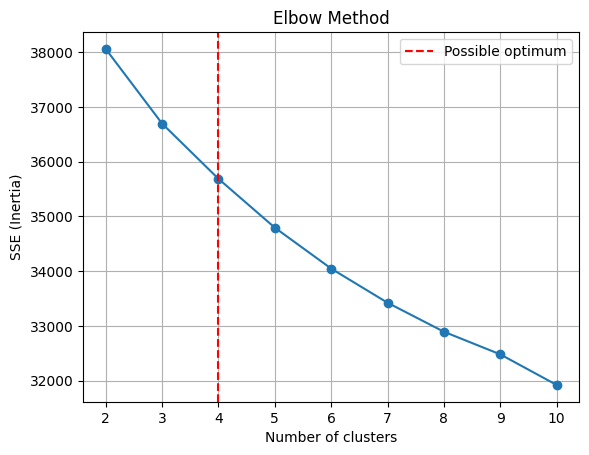

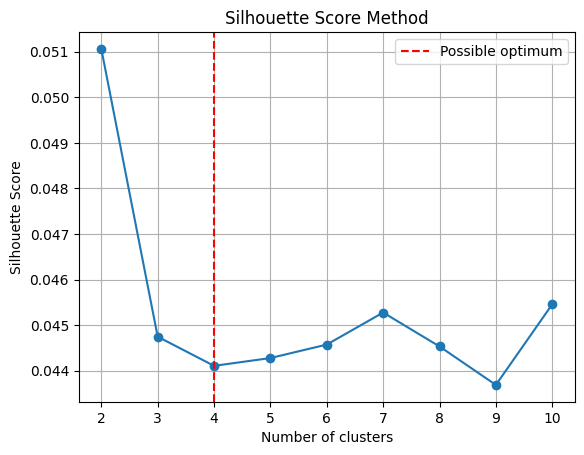

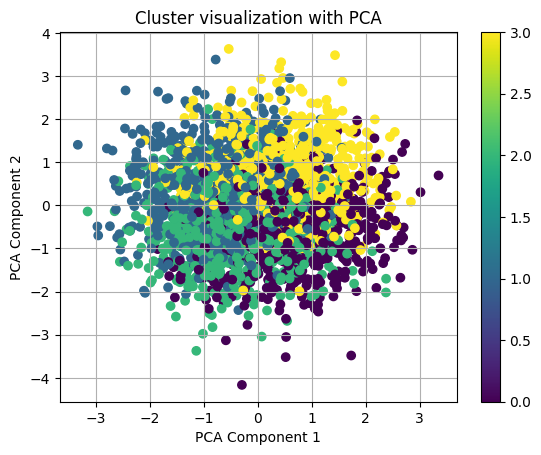

TypeError: agg function failed [how->mean,dtype->object]

In [136]:
# First make sure you have the processed data (after scaler and encoder)
X = X_transformed  # This is the output from your ColumnTransformer

# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1️⃣ Elbow Method to find the optimal number of clusters
sse = []
k_vals = range(2, 11)
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(k_vals, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.axvline(x=4, color='r', linestyle='--', label='Possible optimum')
plt.legend()
plt.show()


# 2️⃣ Silhouette Score to aid in choosing k
scores = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, clusters)
    scores.append(score)

plt.plot(k_vals, scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.axvline(x=4, color='r', linestyle='--', label='Possible optimum')
plt.legend()
plt.show()


# 4️⃣ Apply K-Means with chosen number of clusters
optimal_k = 4  # for example
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Store clusters back to your DataFrame
df['Cluster'] = clusters


# 5️⃣ Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plotting
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar()
plt.show()


# 6️⃣ Interpret clusters
# Combine clusters with raw data for interpretability
cluster_describe = df.groupby('Cluster').mean()

print("Cluster centroid (means of numerical variables):")
print(cluster_describe)


print("\nCluster distribution by categorical variables:")
print(df.groupby(['Cluster', 'Ship_Type']).size())  # Repeat for other categoricals if desirable
print('\n')
print(df.groupby(['Cluster', 'Weather_Condition']).size())  # Repeat for more


# Summary:
# -> Look for high or low values for numerical variables in each clusters
# -> Look for dominant Categories in each clusters
# This forms your interpretability (e.g. "Cluster A = High Cargo, Large Size, Mainly Container ships")
